## TELECOMS CUSTOMER CHURN ANALYSIS PROJECT

### Project Description
This project focuses on understanding, predicting, and reducing customer churn for a telecommunications company using real customer data. The dataset contains information on customer demographics, subscription plans, service usage, billing, and engagement patterns.

In highly competitive industries like telecommunications, customers can easily switch providers due to pricing, service quality, or better offers. As a result, customer churn directly impacts revenue, growth, and long-term sustainability. The goal of this project is to move beyond simply knowing who left, to understanding why customers leave, which customers are likely to leave next, and what the business can do to prevent it.

Project Goal: Understand, predict, and reduce customer churn using data-driven insights. Identify customers at risk of churn and recommend actionable retention strategies.

Data Source: https://lnkd.in/erDSyNV7 

### Problem Framing

#### What is Churn?
Churn is the loss of users, customers, subscribers of a product or business over a period of time. In a telecom business, churn is the rate at which customers, users, subscribers stops using the telecom's product either by a reduction, declne or permanent none use of the product. 

#### Why is churn important to measure and reduce?
Churn is important to measure and reduce because acquiring new customers is more expensive than retaining existing ones and a high churn rate signals poor customer experience or value misalignment. It negatively affects revenue (like Monthly Recurring Revenue - MRR) and indicates potential issues with product, service, or pricing.
Measuring and reducing customer churn is critical because it directly impacts a business's profitability, long-term growth, and brand reputation. High churn forces a company to focus resources on replacing lost customers, which is significantly more expensive than retaining existing ones. 

### Data Loading and Inspection

In [414]:
#Import Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
#Load data
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [419]:
#Size of data
df.shape

(7043, 21)

In [420]:
#Check data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [421]:
#Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [422]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [423]:
#Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Cleaning and Preparation

In [424]:
#Convert TootalCharge to a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [425]:
# Check missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [426]:
#Handle missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [427]:
#Target Variable (Churn) Validation
#Check Column Name
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [428]:
# Check Target Data Type
print(df['Churn'].dtype)

object


In [354]:
#Inspect Unique Values
print(df['Churn'].unique())

['No' 'Yes']


In [429]:
#Check Class Distribution
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Exploratory Data Analysis

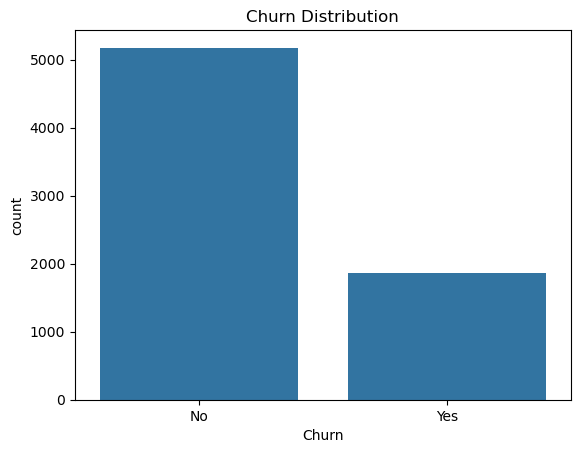

In [430]:
#Churn vs non-churn comparison
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

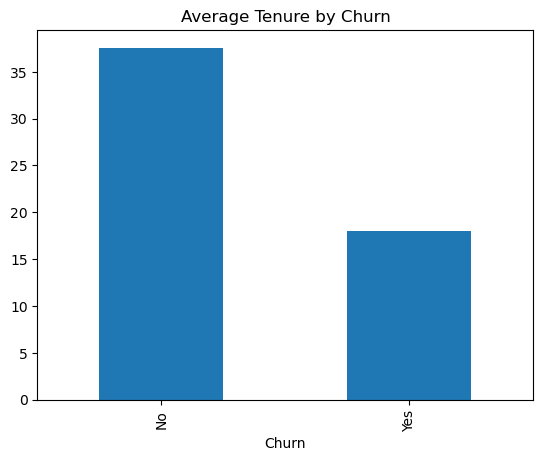

In [431]:
# Churn vs Tenure
df.groupby('Churn')['tenure'].mean().plot(kind='bar', title='Average Tenure by Churn')
plt.show()

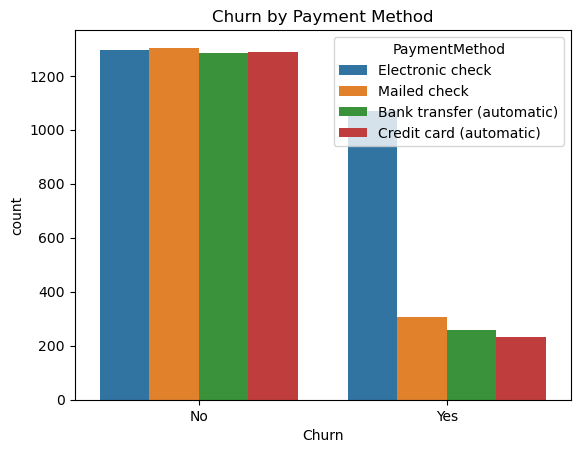

In [358]:
### Bivariate analysis: Comparison between Marital Status and Loan Status

sns.countplot(x='Churn', hue='PaymentMethod', data=df)
plt.title('Churn by Payment Method')
plt.show()

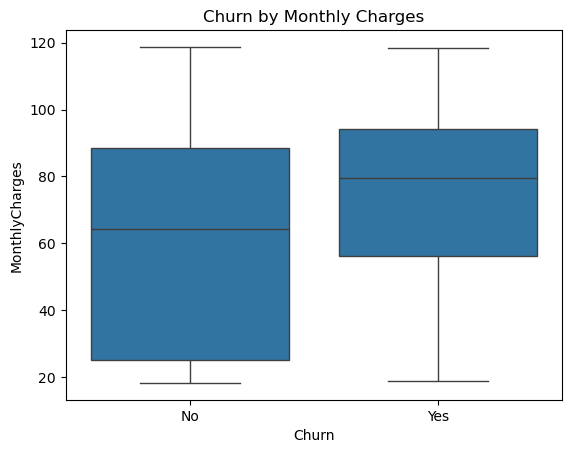

In [359]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn by Monthly Charges')
plt.show()

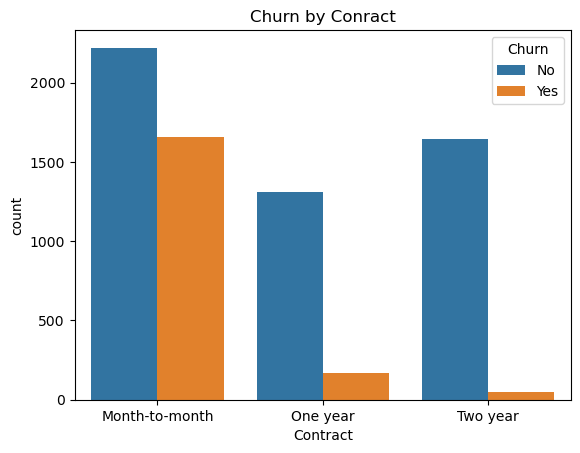

In [360]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Conract')
plt.show()

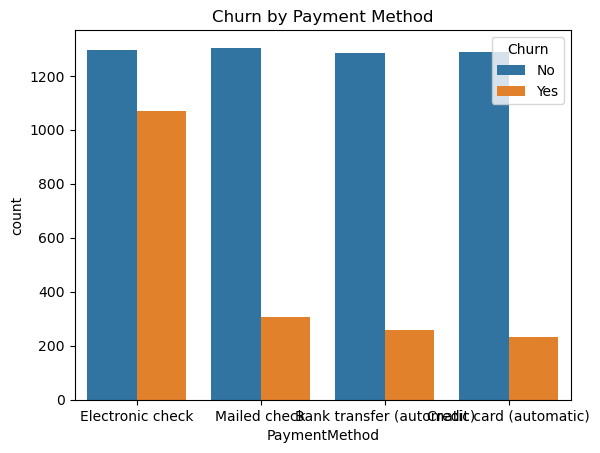

In [361]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.show()

### Feature Engineering

In [432]:
#Encode Target Variable (Churn)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [433]:
#Create Tenure Group
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–1yr', '1–2yrs', '2–4yrs', '4–6yrs']
)

In [434]:
df = df.drop(columns=['customerID','gender'], errors='ignore')

In [435]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [436]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

### Churn Modelling

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

In [438]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\Mrs. Vivian N. Ohai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [439]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [440]:
#Prediction
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

### Model Evaluation

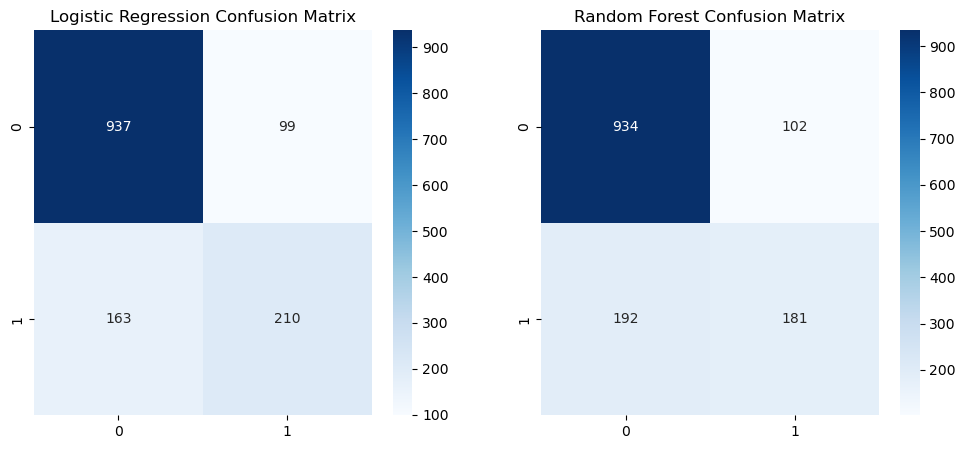

In [441]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_logistic = confusion_matrix(y_test, logistic_predictions)
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.show()

In [442]:
#Precision, Recall, and F1-Score
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [444]:
# ROC-AUC Score
from sklearn.metrics import roc_auc_score

logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Logistic Regression ROC-AUC: {logistic_roc_auc}")
print(f"Random Forest ROC-AUC: {rf_roc_auc}")

Logistic Regression ROC-AUC: 0.8595288126119226
Random Forest ROC-AUC: 0.8260283933876427


### Postdictive Analysis

#### Compare predicted churn vs actual churn
Comparing the model’s churn predictions with actual customer outcomes to assess reliability.
The model performs well as an early warning system. It accurately identifies the majority of customers who stay, helping avoid unnecessary retention spend. It correctly flags a significant share of customers who eventually churn, giving the business time to intervene. This balance makes the model practical for operational use, especially in customer retention and marketing workflows.

#### Where did the model perform well?
a) Early-stage customers
The model is particularly strong at identifying customers who are still new to the company. Customers in their first year are the most likely to churn.
The model also consistently flagged these customers as high risk, meaning if the business focus retention efforts early, we can prevent avoidable churn before habits are formed.

b) Contract structure
Customers on month-to-month contracts were correctly identified as higher risk because they have low commitment and can leave at any time.
The model reliably picked up this pattern. Contract structure is a major lever we can actively control.

c) Price sensitivity
Customers with higher monthly bills were more likely to churn, and the model captured this.

### Business Recomendation

My recommendations for this telecommunications company are as follows:
1. Prioritise High-Risk Customers:
Retention efforts should focus on customers who have tenure below 12 months, are on month-to-month contracts, have high monthly charges, use few services. These customers represent the highest churn risk with immediate business impact.

3. Strengthen early customer experience because most churn happens early in the customer lifecycle.
The business should improve onboarding during the first 90 days, take proactive check-ins for new customers, clear education on how to get maximum value from services.

4. Review pricing and value perception by offering loyalty or tenure-based discounts and improving communication around value and benefits

5. Encourage longer-term contracts
Customers on long-term contracts churn significantly churn less. Some action steps include incentivise upgrades from month-to-month plans an target high-risk customers with contract-based offers

6. Operationalise the churn model
The model should be integrated into daily operations. This analysis provides a practical, data-driven framework to reduce churn and protect revenueBy acting on these insights, the company can improve customer lifetime value, reduce revenue leakage, and move from reactive to proactive retention management.